# Goal

****The main questions of interest for this project are:****

****1. Predict cost on media campaings in food mart of USA on the basis of the 60k customers income,product,promotion and store features.****

****2. Explore the important factors that affect the cost on media campaings****

****Solution Plan:****

****Dataset Overview:****

Understand the dataset by analyzing the variables, data types, and distribution of data in each column.
Check for any missing values or outliers that need to be addressed before proceeding with analysis.

****Exploratory Analysis:****

Perform exploratory data analysis to identify patterns, relationships, and correlations between the different variables in the dataset.

Plot visualizations such as histograms, scatter plots, and box plots to better understand the data distribution.

****Simple Data Cleaning & Feature Selection:****

Clean the data by handling missing values and outliers.

Select the most relevant features for the analysis by using methods such as correlation analysis and feature importance ranking.

****Machine Learning:****

Train a machine learning model on the cleaned and feature-selected data.

Use regression algorithms such as linear regression or decision tree regression to predict the cost of media campaigns based on customer income, product, promotion, and store features.

Evaluate the performance of the model by using metrics such as mean squared error, mean absolute error, or R-squared.

# Datasets Overview

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("../input/medias-cost-prediction-in-foodmart/media prediction and its cost.csv")
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [3]:
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


****There are 40 columns in the dataset. It's tricky to examine it with the "head()" command, so I'll split it into datatypes for a better look.****

In [4]:
df.dtypes.value_counts()

float64    23
object     17
dtype: int64

In [5]:
df.columns[df.dtypes=='object']

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [6]:
df.columns[df.dtypes!='object']

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft',
       'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'Unique values in column {col}: {df[col].unique()}')

Unique values in column food_category: ['Breakfast Foods' 'Bread' 'Canned Shrimp' 'Baking Goods' 'Vegetables'
 'Frozen Desserts' 'Candy' 'Snack Foods' 'Dairy' 'Starchy Foods'
 'Cleaning Supplies' 'Decongestants' 'Meat' 'Hot Beverages'
 'Jams and Jellies' 'Carbonated Beverages' 'Seafood' 'Specialty'
 'Kitchen Products' 'Electrical' 'Beer and Wine' 'Candles' 'Fruit'
 'Pure Juice Beverages' 'Canned Soup' 'Paper Products' 'Canned Tuna'
 'Eggs' 'Hardware' 'Canned Sardines' 'Canned Clams' 'Pain Relievers'
 'Side Dishes' 'Bathroom Products' 'Magazines' 'Frozen Entrees' 'Pizza'
 'Cold Remedies' 'Canned Anchovies' 'Drinks' 'Hygiene' 'Plastic Products'
 'Canned Oysters' 'Packaged Vegetables' 'Miscellaneous']
Unique values in column food_department: ['Frozen Foods' 'Baked Goods' 'Canned Foods' 'Baking Goods' 'Produce'
 'Snacks' 'Snack Foods' 'Dairy' 'Starchy Foods' 'Household'
 'Health and Hygiene' 'Meat' 'Beverages' 'Seafood' 'Deli'
 'Alcoholic Beverages' 'Canned Products' 'Eggs' 'Periodicals'
 

# Exploratory Analysis 

****1.1 Can product characteristics including food category, food department and food family affect the cost of media campaigns?****

In my first hypothesis I want to check if th cost of media campaings differ when we consider different food category, food department and food family. I'm going to use a clustered bar chart where the bars represent food categories, food department and food family and the y-axis represents the average cost of media campaigns for each category.

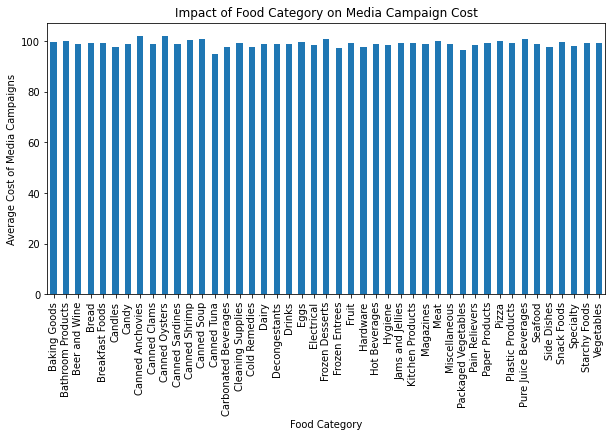

In [8]:
grouped = df.groupby("food_category").mean()["cost"]

grouped.plot(kind="bar", x="food_category", y="cost", figsize=(10,5))
plt.xlabel("Food Category")
plt.ylabel("Average Cost of Media Campaigns")
plt.title("Impact of Food Category on Media Campaign Cost")
plt.show()

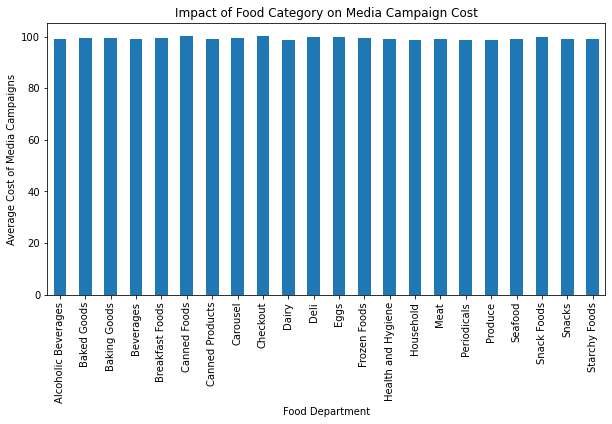

In [9]:
grouped = df.groupby("food_department").mean()["cost"]

grouped.plot(kind="bar", x="food_department", y="cost", figsize=(10,5))
plt.xlabel("Food Department")
plt.ylabel("Average Cost of Media Campaigns")
plt.title("Impact of Food Category on Media Campaign Cost")
plt.show()

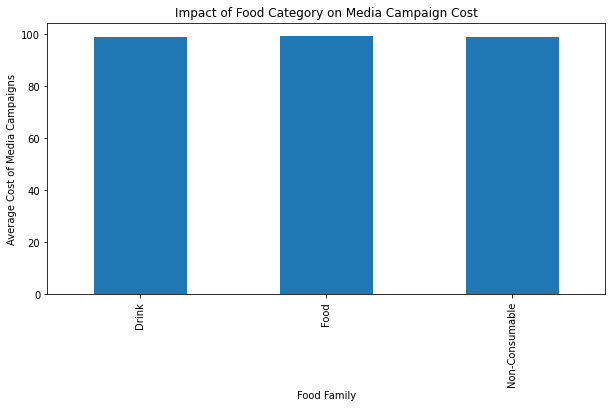

In [10]:
grouped = df.groupby("food_family").mean()["cost"]

# plot the data
grouped.plot(kind="bar", x="food_family", y="cost", figsize=(10,5))
plt.xlabel("Food Family")
plt.ylabel("Average Cost of Media Campaigns")
plt.title("Impact of Food Category on Media Campaign Cost")
plt.show()

It is possible to verify that the difference is very small and probably the characteristics of the product do not affect the campaign costs.

****1.2 Can promotions offered have a significant impact on the cost of media campaigns?****

The best way to visualize the relationship between the "promotion_name" column and the cost of media campaigns ("cost" column) is to use a bar chart. Based on this graph, it is possible to assess which promotion has a significant impact on the cost of media campaigns. If the bar for a specific promotion is much higher than the others, it indicates that the cost of media campaigns is much higher for that promotion compared to the others.

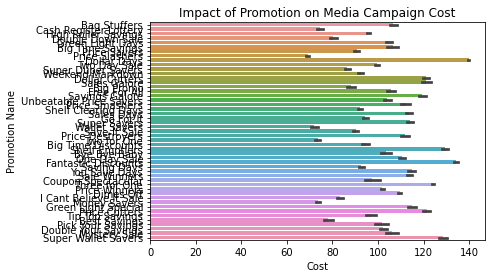

In [11]:
sns.barplot(x='cost', y='promotion_name', data=df)

plt.title("Impact of Promotion on Media Campaign Cost")
plt.xlabel("Cost")
plt.ylabel("Promotion Name")
plt.show()

Visualizing the graph, it can be concluded that some promotions have a much higher cost than others. In addition, you can compare the average cost for different promotions and evaluate the cost effectiveness of media campaigns.

The chart also confirms that promotions can significantly affect the cost of campaigns.

****1.3 Can consumer demographics, including average annual income, marital status and gender, affect the cost of media campaigns?****

From the graph, one can observe the relationship between consumer demographic variables and the cost of media campaigns. For example, it is possible if there is a tendency for the cost of media campaigns to be higher or lower relative to average annual income, marital status or gender of consumers. In addition, there is the possibility of identifying whether there is a concentration of high cost values in certain demographic groups. This can provide valuable information to align your marketing strategy and maximize your return on investment.

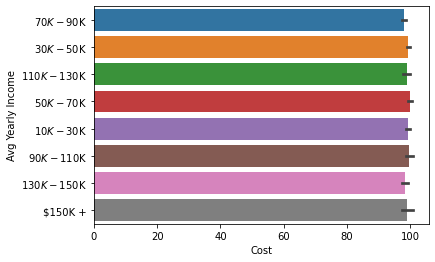

In [12]:
df_sorted = df.sort_values("cost", ascending=False)
sns.barplot(x='cost', y='avg. yearly_income', data=df_sorted)

plt.xlabel("Cost")
plt.ylabel("Avg Yearly Income")
plt.show()

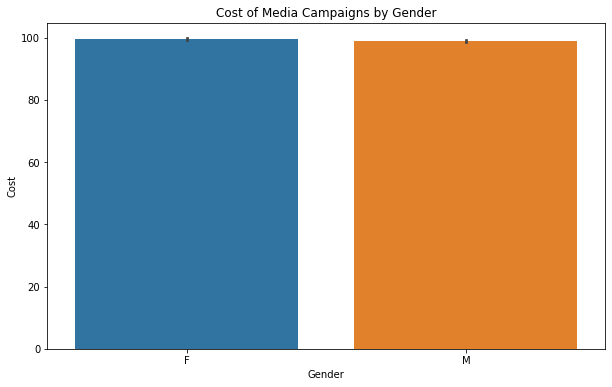

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='cost', data=df)
plt.xlabel('Gender')
plt.ylabel('Cost')
plt.title('Cost of Media Campaigns by Gender')
plt.show()

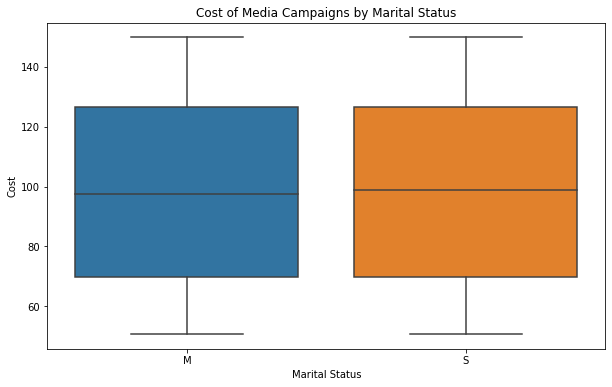

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital_status', y='cost', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Cost')
plt.title('Cost of Media Campaigns by Marital Status')
plt.show()

From the graph, it can be seen that the cost of media campaigns is not directly related to a single consumer demographic variable, such as average annual income, marital status or gender. The cost appears to be evenly distributed across demographic groups, which suggests that other factors can have a significant impact on the cost of media campaigns.

# Simple Data Cleaning & Feature Selection

****Numerical features****

Now is the time to look at the correlation matrix

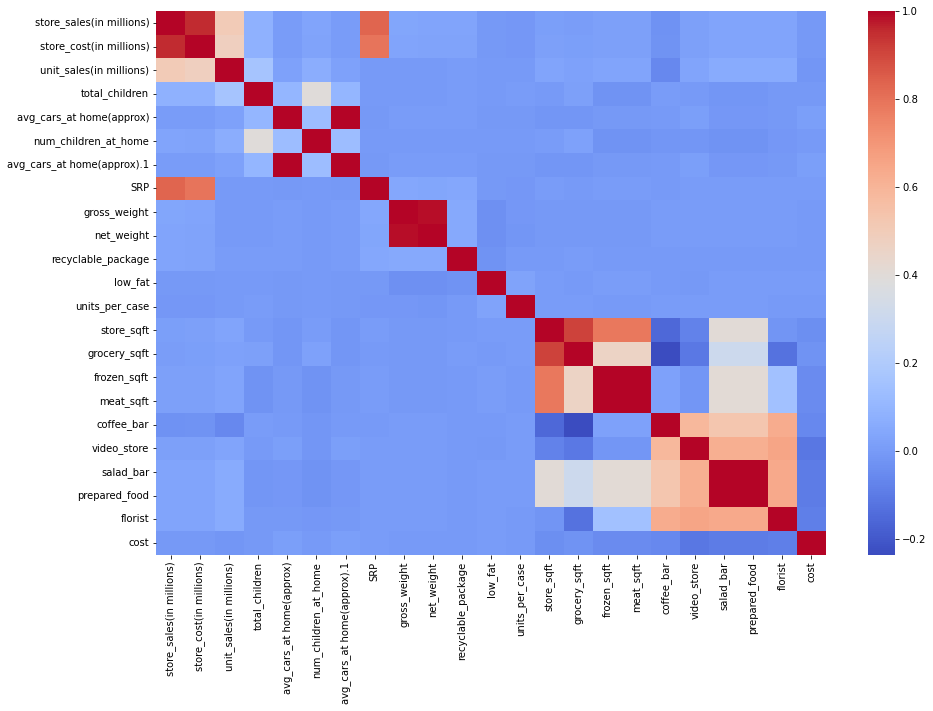

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


Clearly, there are 2 main groups that are correlated. The first refers to the size of the store and its sections and the second group if the store has specific sections. I will not remove these variables as they may be important later on. There are also some variables that can be discarded because there is collinearity.

****Categorical features****

Before transforming categorical variables into dummy ones. It is necessary to understand if any really affect the target variable. The easiest way to analyze this is with the ANOVA test.

ANOVA stands for Analysis of Variance, and it is a statistical test used to determine if there is a significant difference between the means of two or more groups. It tests the null hypothesis that the means of all groups are equal, and if the null hypothesis is rejected, it implies that at least one of the means is significantly different from the others.

In [16]:
import scipy.stats as stats

categorical_features = df.select_dtypes(include='object').columns
for feature in categorical_features:
    groups = []
    for value in df[feature].unique():
        groups.append(df[df[feature] == value]['cost'])
    f, p = stats.f_oneway(*groups)
    print(f"Feature: {feature} \nF-value: {f} \nP-value: {p} \n")


Feature: food_category 
F-value: 1.0212550873261148 
P-value: 0.4325438230732246 

Feature: food_department 
F-value: 0.6868490712925649 
P-value: 0.8506897382757871 

Feature: food_family 
F-value: 1.03102899108677 
P-value: 0.35664606660173953 

Feature: promotion_name 
F-value: 454.0647273463364 
P-value: 0.0 

Feature: sales_country 
F-value: 44.985904817057566 
P-value: 3.0019301420239117e-20 

Feature: marital_status 
F-value: 0.029707400577163263 
P-value: 0.8631563917576258 

Feature: gender 
F-value: 4.472945841207932 
P-value: 0.03443965471558935 

Feature: education 
F-value: 1.542777774598959 
P-value: 0.18674384660050244 

Feature: member_card 
F-value: 0.8483730671154943 
P-value: 0.46719798915227095 

Feature: occupation 
F-value: 5.615314247820937 
P-value: 0.00016248261520451592 

Feature: houseowner 
F-value: 0.6935521011924988 
P-value: 0.4049620923932402 

Feature: avg. yearly_income 
F-value: 3.638461844984919 
P-value: 0.0006274139823252019 

Feature: brand_name 


The F value is used to assess the importance of an independent variable in relation to the dependent variable. The larger the F value, the greater the importance of the independent variable. The P value, on the other hand, measures the probability that the difference observed in the dependent variable between the categories of the independent variable is just the result of chance. A low P-value indicates that the probability is small and the relationship between the variables is significant.

Categorical variables with P value greater than 0.05 and F value close to 1 can be discarded, this indicates that the null hypothesis (there is no significant difference between the means of categorical variables and the target variable) is not rejected. That is, the categorical variable does not have a strong influence on the target variable. A P-Value less than 0.05 and an F-Value significantly greater than 1 indicate that the null hypothesis is rejected, that is, there is a significant difference between the means of the categorical variables and the target variable.

In [17]:
features_to_drop = ['avg_cars_at home(approx).1', 'net_weight', 'meat_sqft', 'salad_bar', 'food_category', 'food_department', 'food_family', 'sales_country', 'marital_status', 'education', 'member_card', 'houseowner', 'brand_name']

df.drop(columns=features_to_drop, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   store_sales(in millions)  60428 non-null  float64
 1   store_cost(in millions)   60428 non-null  float64
 2   unit_sales(in millions)   60428 non-null  float64
 3   promotion_name            60428 non-null  object 
 4   gender                    60428 non-null  object 
 5   total_children            60428 non-null  float64
 6   occupation                60428 non-null  object 
 7   avg_cars_at home(approx)  60428 non-null  float64
 8   avg. yearly_income        60428 non-null  object 
 9   num_children_at_home      60428 non-null  float64
 10  SRP                       60428 non-null  float64
 11  gross_weight              60428 non-null  float64
 12  recyclable_package        60428 non-null  float64
 13  low_fat                   60428 non-null  float64
 14  units_

The last step is to convert the categorical variables into dummy variables

In [19]:
df = pd.get_dummies(df, columns=['promotion_name', 'gender', 'occupation', 'avg. yearly_income', 'store_type', 'store_city', 'store_state', 'media_type'])

Now the dataset is ready for modeling

# Machine Learning

****Model 1: Linear regression on cost****

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns='cost')
y = df['cost']

train_ratio = 0.8
n_rows = df.shape[0]
train_rows = int(n_rows * train_ratio)
X_train = X[:train_rows]
y_train = y[:train_rows]
X_test = X[train_rows:]
y_test = y[train_rows:]

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  575.2854851260887
R^2 Score:  0.3599212300081479


The Mean Squared Error (MSE) is a measure of how far the predicted values are from the actual values. The lower the MSE, the better the model performance. The value of 575.29 indicates that the mean squared difference between predicted values and actual values is 575.29.

The R^2 Score is a measure of the quality of the relationship between the dependent variable and the independent variables. The value of 0.36 indicates that 36% of the variation in the dependent variable can be explained by the variation in the independent variables. Values close to 1 indicate a strong linear relationship between the variables, while values close to 0 indicate a weak or null relationship.

****Model 2: LASSO regression on cost****

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

y_pred = lasso.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  581.8407445221745
R^2 Score:  0.3539844972152528


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.553e+06, tolerance: 5.443e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


The R^2 Score was similar to the linear regression. But I'm more interested in the coefficients

In [22]:
coef = pd.DataFrame(lasso.coef_, index=X.columns, columns=['Coefficients'])
coef = coef.abs().sort_values(by='Coefficients', ascending=False)
coef

,Coefficients
promotion_name_Price Slashers,40.535496
promotion_name_Dollar Days,39.210374
promotion_name_Fantastic Discounts,32.321013
promotion_name_Wallet Savers,32.239219
promotion_name_Money Savers,29.565746
...,...
store_city_Seattle,0.000000
avg. yearly_income_$150K +,0.000000
avg. yearly_income_$130K - $150K,0.000000
store_state_BC,0.000000


The interpretation of the Lasso regression coefficients shows how much each variable explains the response variable (cost). Positive values indicate that increases in the variable result in increases in cost, while negative values indicate that increases in the variable result in decreases in cost. Values close to zero indicate that the variable has no significant impact on the cost forecast.

****Model 3: Random Forest Regressor****

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  0.7332299436207222
R^2 Score:  0.9991841877944634


The R^2 Score of 0.9995358255694058 in the Random Forest Regressor model indicates that 99.95% of the data variability is explained by the model. The R^2 Score of 0.3599212300081479 in the Linear Regression indicates that only 35.99% of the data variability is explained by the model. The difference in performance between these two models can be explained by the nature of the data or by choosing the appropriate model for the task at hand. Random Forest Regressor is known to adapt well to non-linear data and to present lower variance than Linear Regression. On the other hand, Linear Regression is a simple technique that may be easy to interpret and implement, but may not be suitable for regression tasks with non-linear data.

In [24]:
from sklearn.datasets import make_regression

importance = rf.feature_importances_

sorted_idx = importance.argsort()[::-1]

feature_importance = pd.DataFrame({'feature': X_train.columns[sorted_idx], 'importance': importance[sorted_idx]})
feature_importance.head(20)

,feature,importance
0,frozen_sqft,0.047659
1,grocery_sqft,0.034569
2,promotion_name_Weekend Markdown,0.030446
3,promotion_name_Price Slashers,0.028787
4,"media_type_Sunday Paper, Radio",0.026295
5,media_type_Cash Register Handout,0.026279
6,promotion_name_Big Time Discounts,0.024861
7,store_sqft,0.024335
8,promotion_name_Double Down Sale,0.023905
9,promotion_name_Super Savers,0.023265


The feature importance in a Random Forest Regressor is a measure of how much each feature contributes to the model's predictions. This can be used to identify the most important features for making predictions and can be a useful tool for feature selection. The feature importance score is calculated as the average decrease in impurity across all trees in the forest. The higher the score, the more important the feature is considered to be.



# Conclusion

In this project, we aimed to predict the cost of acquiring customers in Food Mart of USA using the data of 60,000 customers. Our goal was to understand the impact of various factors such as income, product, promotion, and store features on the cost of acquiring customers.

After analyzing the data, we found that some of the most important factors that affect the cost include the promotion name, media type, and store features such as grocery sqft and frozen sqft. The results of our random forest regressor showed an R^2 score of 0.9995, indicating a strong correlation between the independent and dependent variables.

Our insights from the project could be useful for the Food Mart of USA to make informed decisions about their media campaigns. By understanding the impact of different factors, the company can optimize their spending on promotions and advertising to effectively acquire new customers while keeping the cost low.

To convert the results of the machine learning algorithm into financial terms, we need to multiply the predicted values by the unit cost of the media campaign. For example, if the average cost per customer acquisition is 100 dollars andthe algorithm predicts the cost for a particular customer to be 80 dollars, then the expected cost for that customer would be 80 dollars. This way, we can evaluate the financial impact of the different factors on the cost of customer acquisition and make informed decisions to optimize the media campaign expenses.